In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zomato = pd.read_csv(r"C:\Users\DELL\Downloads\Zomato-data-.csv")

In [4]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
def handleRate(value):
        value = str(value).split('/')
        value = value[0];
        return float(value)

zomato['rate'] = zomato['rate'].apply(handleRate)

In [6]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
#There are no null values present in the zomato dataframe.

Text(0.5, 0, 'Type of Restaurant')

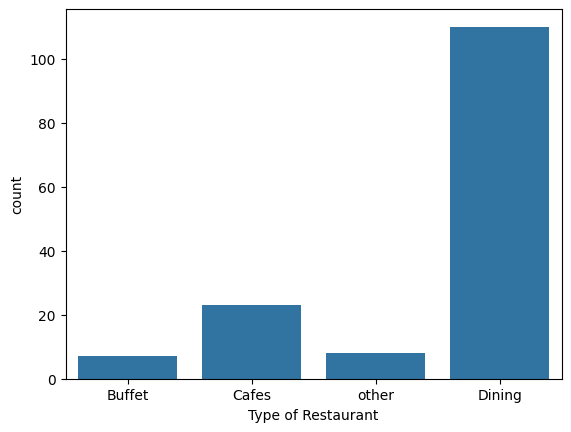

In [9]:
sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel('Type of Restaurant')

In [34]:
#The majority of restaurant falls into "Dining" category.

Text(0, 0.5, 'Votes')

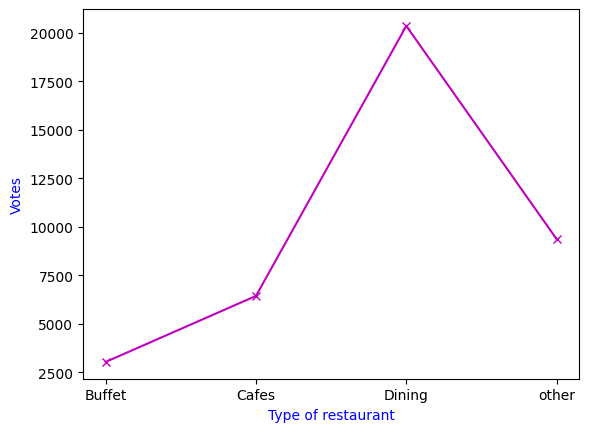

In [14]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='m', marker='x')
plt.xlabel('Type of restaurant', c='blue', size=10)
plt.ylabel('Votes', c='blue', size=10)

In [33]:
#Dining restaurants are prefered by larger number of individuals.

In [19]:
max_votes = zomato['votes'].max()
restaurant_with_max_votes = zomato.loc[zomato['votes'] == max_votes, 'name']
'Restaurant with maximum votes : '
restaurant_with_max_votes = pd.DataFrame(restaurant_with_max_votes)
restaurant_with_max_votes

,name
38,Empire Restaurant


In [32]:
#Therefore Empire Restaurant has maximum of 38 votes.

<Axes: xlabel='online_order', ylabel='count'>

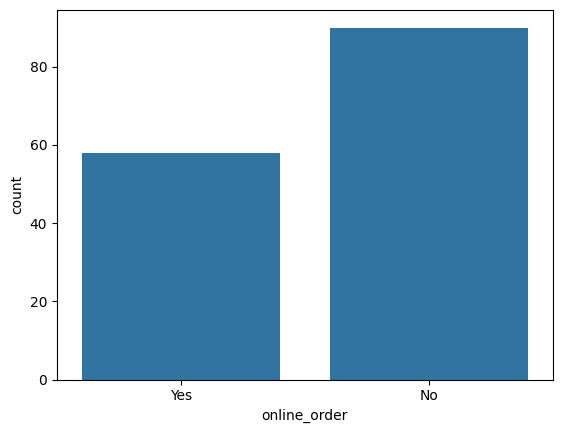

In [22]:
sns.countplot(x = zomato['online_order'])

In [31]:
#This suggests that maximum restaurants do not accept online orders.

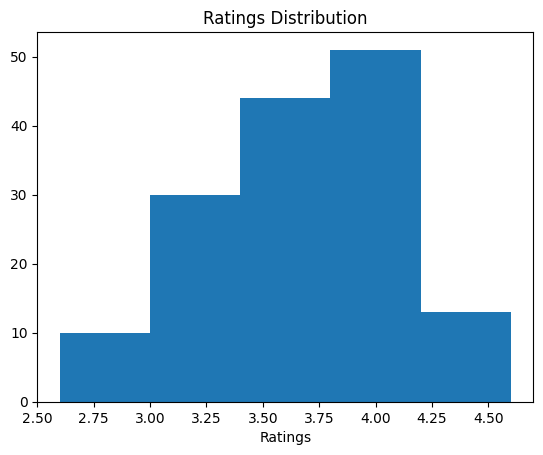

In [43]:
plt.hist(zomato['rate'],bins=5)
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.show()

In [27]:
#The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

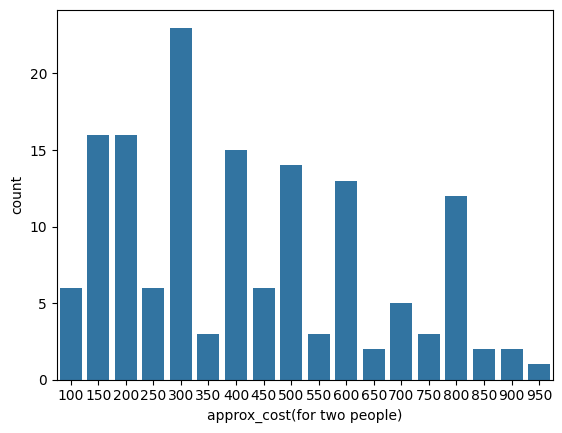

In [28]:
couple_data=zomato['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [29]:
#The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

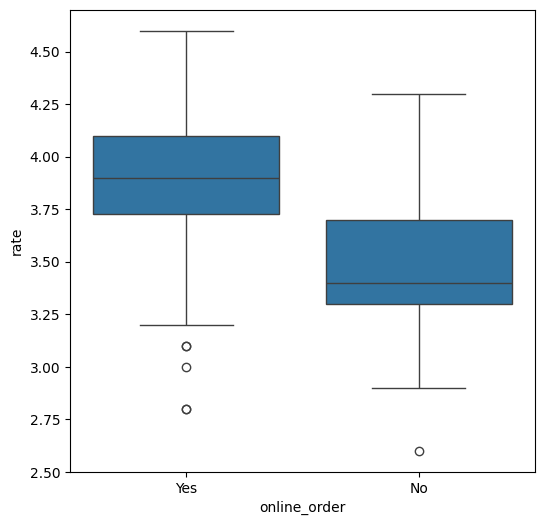

In [30]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = zomato)

In [36]:
#Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

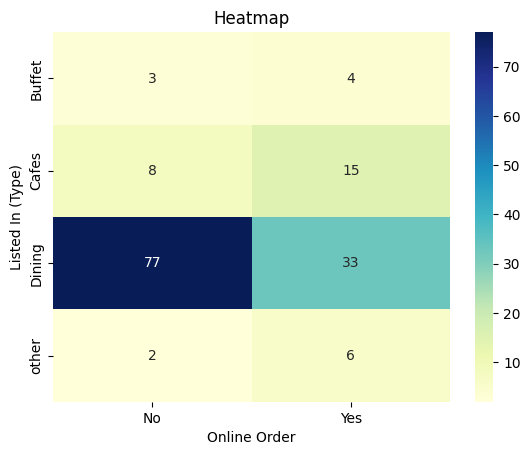

In [37]:
pivot_table = zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [39]:
#Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
#This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.